/tmp/ipykernel_25555/3331603079.py:139: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  img = ax.pcolormesh(mod_lon,mod_lat,data,cmap='gray',vmin=0,vmax=max(cbtick))


12 32


/tmp/ipykernel_25555/3331603079.py:191: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  trop_t=ds['TROPT'][:]
/tmp/ipykernel_25555/3331603079.py:192: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  merra2_lon=ds['lon'][:]
/tmp/ipykernel_25555/3331603079.py:193: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this 

[Text(1, 0, 'No Rain'),
 Text(1, 1, 'Stratiform'),
 Text(1, 2, 'Convection'),
 Text(1, 3, 'Other')]

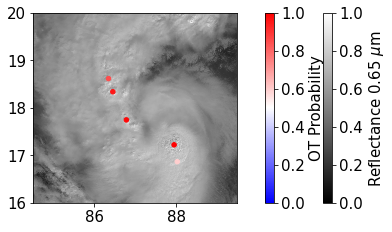

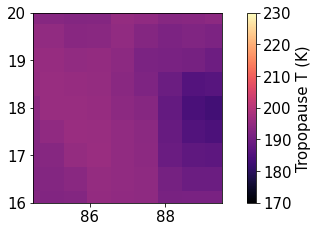

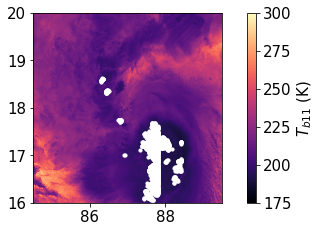

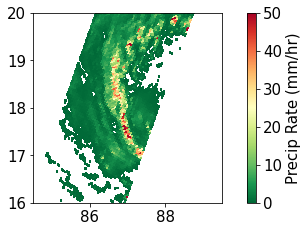

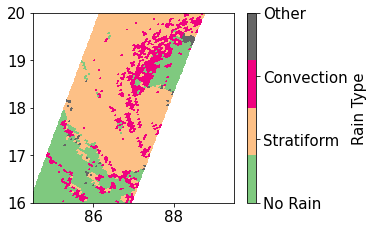

In [13]:
# this script is to visualize the OT cases in mesoscale level, data including MODIS vis, BT11, OT probability, GPM radar reflectivity, 
# tropopause T.

# cases 1, tropical cases --2019 Nov 05 (309), Pacific ocean, lat 9.1202, lon 151.1344
# cases 2, tropical cyclone -- 2019. Nov 08, , Indian ocean, lat 17.74, lon 86.78, 2019- nov. 5, lat 19.25, lon-152.14
# cases 3, midlatitude cold air -- 2020.Feb 1,Pacific Ocean, lat 47.33, lon -135.89
# cases 4, midlatitude cyclone 
def read_text(fname):
    fo=open(fname,'r') #create file object
    #headstr=fo.readline()
    data=fo.readlines()
    #print (data)
    fo.close()  # close object
    return data

import numpy as np
from pyhdf.SD import SD, SDC
import h5py
import netCDF4 as nc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from scipy.ndimage import gaussian_filter
import glob
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size

planck_c1=1.191042e8
planck_c2=1.4387752e4
fontsz=15
winsize2=(4.5,3.5)
winsize1=(6.1,3.5)
# for case1 tropical convection
lat=[7,11]
lon=[146,151]
shrink=1
cbtick=[0.0,0.2,0.4,0.6,0.8,1.0]
ptick=[0.0,0.2,0.4,0.6,0.8,1.0]
mod02fname=glob.glob('/data/keeling/a/yulanh/satellite/TerraDataArchive/MODIS/MOD021KM/2019/309/MOD021KM.A2019309.0050*')
mod03fname=glob.glob('/data/keeling/a/yulanh/satellite/TerraDataArchive/MODIS/MOD03/2019/309/MOD03.A2019309.0050*')
mod02fname=mod02fname[0]
mod03fname=mod03fname[0]
OT_fname = '/data/keeling/a/yulanh/c/OT_output/Terra/2019/MODIS_OTinfo_2019309.0050.txt'
GPM_fname='/data/accp/a/snesbitt/gpmdata/radar/2019/11/2A.GPM.DPR.V8-20180723.20191105-S000639-E013912.032301.V06A.HDF5'
merra2_fname='/data/keeling/a/yulanh/c/MERRA-2/2019/MERRA2_400.inst1_2d_asm_Nx.20191105.nc4'
hour_scp=0

# for case 2 cold air in midlat

lat=[54,58]
lon=[-17,-12]
shrink=1
cbtick=[0.0,0.1,0.2,0.3,0.4,0.5]
mod02fname=glob.glob('/data/keeling/a/yulanh/satellite/TerraDataArchive/MODIS/MOD021KM/2019/069/MOD021KM.A2019069.1210*')
mod03fname=glob.glob('/data/keeling/a/yulanh/satellite/TerraDataArchive/MODIS/MOD03/2019/069/MOD03.A2019069.1210*')
mod02fname=mod02fname[0]
mod03fname=mod03fname[0]
OT_fname = '/data/keeling/a/yulanh/c/OT_output/Terra/2019/MODIS_OTinfo_2019069.1210.txt'
GPM_fname='/data/accp/a/snesbitt/gpmdata/radar/2019/03/2A.GPM.DPR.V8-20180723.20190310-S112337-E125610.028575.V06A.HDF5'
merra2_fname='/data/keeling/a/yulanh/c/MERRA-2/2019/MERRA2_400.inst1_2d_asm_Nx.20190310.nc4'
hour_scp=11

#case 3 midlatitude cyclone
lat=[41,47]
lon=[163,169]
shrink=1
cbtick=[0.0,0.1,0.2,0.3,0.4]
mod02fname=glob.glob('/data/keeling/a/yulanh/satellite/TerraDataArchive/MODIS/MOD021KM/2018/349/MOD021KM.A2018349.0020*')
mod03fname=glob.glob('/data/keeling/a/yulanh/satellite/TerraDataArchive/MODIS/MOD03/2018/349/MOD03.A2018349.0020*')
mod02fname=mod02fname[0]
mod03fname=mod03fname[0]
OT_fname = '/data/keeling/a/yulanh/c/OT_output/Terra/2018/MODIS_OTinfo_2018349.0020.txt'
GPM_fname='/data/accp/a/snesbitt/gpmdata/radar/2018/12/2A.GPM.DPR.V8-20180723.20181214-S232613-E005847.027245.V06A.HDF5'
merra2_fname='/data/keeling/a/yulanh/c/MERRA-2/2018/MERRA2_400.inst1_2d_asm_Nx.20181215.nc4'
hour_scp=0

#case 4 TC 
lat=[16,20]
lon=[84.5,89.5]
shrink=1
cbtick=[0.0,0.2,0.4,0.6,0.8,1.0]
mod02fname=glob.glob('/data/keeling/a/yulanh/satellite/TerraDataArchive/MODIS/MOD021KM/2019/312/MOD021KM.A2019312.0435.*')
mod03fname=glob.glob('/data/keeling/a/yulanh/satellite/TerraDataArchive/MODIS/MOD03/2019/312/MOD03.A2019312.0435.*')
mod02fname=mod02fname[0]
mod03fname=mod03fname[0]
OT_fname = '/data/keeling/a/yulanh/c/OT_output/Terra/2019/MODIS_OTinfo_2019312.0435.txt'
GPM_fname='/data/accp/a/snesbitt/gpmdata/radar/2019/11/2A.GPM.DPR.V8-20180723.20191108-S034225-E051458.032350.V06A.HDF5'
merra2_fname='/data/keeling/a/yulanh/c/MERRA-2/2019/MERRA2_400.inst1_2d_asm_Nx.20191108.nc4'
hour_scp=4

#case5 midlat convection 
#lat=[34.,35.5]
#lon=[-89.5,-87.5]
#winsize=(10,10)
#shrink=0.25
#pad=0.06
#mod02fname=glob.glob('/data/keeling/a/yulanh/satellite/TerraDataArchive/MODIS/MOD021KM/2020/194/MOD021KM.A2020194.1610.*')
#mod03fname=glob.glob('/data/keeling/a/yulanh/satellite/TerraDataArchive/MODIS/MOD03/2020/194/MOD03.A2020194.1610.*')
#mod02fname=mod02fname[0]
#mod03fname=mod03fname[0]
#OT_fname = '/data/keeling/a/yulanh/c/OT_output/Terra/2020/MODIS_OTinfo_2020194.1610.txt'
#GPM_fname='/data/accp/a/snesbitt/gpmdata/radar/2020/07/2A.GPM.DPR.V8-20180723.20200712-S214722-E231954.036204.V06A.HDF5'
#merra2_fname='/data/keeling/a/yulanh/c/MERRA-2/2020/MERRA2_400.inst1_2d_asm_Nx.20200712.nc4'
#hour_scp=15

#========================
hdf=SD(mod03fname,SDC.READ)
mod_lat=hdf.select('Latitude')[:]
mod_lon=hdf.select('Longitude')[:]

hdf=SD(mod02fname,SDC.READ)
sds_250=hdf.select('EV_250_Aggr1km_RefSB')
data_250=sds_250.get()
sds_250_att=sds_250.attributes()
for key, value in sds_250_att.items():
    if key == 'reflectance_scales':
        scale_250=np.asarray(value)
    if key == 'reflectance_offsets':
        offset_250=np.asarray(value)
        
sds_500=hdf.select('EV_500_Aggr1km_RefSB')
data_500=sds_500.get()
sds_500_att=sds_500.attributes()
for key, value in sds_500_att.items():
    if key == 'reflectance_scales':
        scale_500=np.asarray(value)
    if key == 'reflectance_offsets':
        offset_500=np.asarray(value)

data_shape=data_500.shape
along_track=data_shape[1]
cross_track=data_shape[2]


data=( data_250[0,:,:] - offset_250[0] ) * scale_250[0] 

fig,ax = plt.subplots(figsize=winsize1)#,subplot_kw={'projection': ccrs.PlateCarree()})#,constrained_layout=True)
img = ax.pcolormesh(mod_lon,mod_lat,data,cmap='gray',vmin=0,vmax=max(cbtick))
ax.set_xlim(lon)
ax.set_ylim(lat)
#gl=ax.gridlines(draw_labels=True,linestyle='None')
#gl.xlabels_top=False
#gl.ylabels_right=False
#gl.xlines=False
#gl.ylines=False
#ax.xlabel_style={'size':fontsz,'color':'black'}
#ax.ylabel_style={'size':fontsz,'color':'black'}
plt.rcParams['font.size'] = '15'
cb=plt.colorbar(img,shrink=shrink,ticks=cbtick) 
cb.ax.tick_params(labelsize=fontsz)
cb.set_label(label='Reflectance 0.65 $\mu$m',size=fontsz)
#fig.savefig(save_title+'reflectance.jpg')


OTdata=read_text(OT_fname)
splitcol=OTdata[0].split(' ')
Ncol=len(splitcol)-splitcol.count('')
Nrow=len(OTdata)
xscp=np.zeros(Nrow,'i')
yscp=np.zeros(Nrow,'i')
OTlon =np.zeros(Nrow,'f')
OTlat =np.zeros(Nrow,'f')
OTprob=np.zeros(Nrow,'f')
OTarea=np.zeros(Nrow,'f')
print(Nrow,Ncol)
# transfer data from string to float
dataT=np.zeros((Nrow,Ncol),'f')
for i in np.arange(Nrow):
    splitcol=OTdata[i].split(' ')
    k=0
    for j in range(len(splitcol)):
        if splitcol[j] != '' and splitcol[j] != '\n' : 
            dataT[i,k]=float(splitcol[j])
            k=k+1
            
    xscp[i]=dataT[i,0]
    yscp[i]=dataT[i,1]
    OTlon[i]=dataT[i,2]
    OTlat[i]=dataT[i,3]
    OTprob[i]=dataT[i,4]
    OTarea[i]=dataT[i,5]
    
p1=plt.scatter(OTlon,OTlat,s=20,c=OTprob,cmap=plt.get_cmap('bwr'),vmin=0,vmax=1)
cb1=plt.colorbar(p1,shrink=shrink,pad=pad,ticks=ptick) 
cb1.ax.tick_params(labelsize=fontsz)
cb1.set_label(label='OT Probability',size=fontsz)

#== to plot merra 2===
ds=nc.Dataset(merra2_fname)
trop_t=ds['TROPT'][:]
merra2_lon=ds['lon'][:]
merra2_lat=ds['lat'][:]

fig,ax = plt.subplots(figsize=winsize2)#,subplot_kw={'projection': ccrs.PlateCarree()},constrained_layout=True)
img = ax.pcolormesh(merra2_lon,merra2_lat,trop_t[hour_scp,:,:],cmap='magma',vmin=170,vmax=230)
#ax.set_aspect(300)
ax.set_xlim(lon)
ax.set_ylim(lat)
#gl=ax.gridlines(draw_labels=True,linestyle='None')
#gl.xlabels_top=False
#gl.ylabels_right=False
#gl.xlines=False
#gl.ylines=False
#gl.xlabel_style={'size':fontsz,'color':'black'}
#gl.ylabel_style={'size':fontsz,'color':'black'}
cb2=plt.colorbar(img,shrink=shrink,pad=pad) 
cb2.ax.tick_params(labelsize=fontsz)
cb2.set_label(label='Tropopause T (K)',size=fontsz)
#=== for BT11
emis_obj=hdf.select('EV_1KM_Emissive')

for key, value in emis_obj.attributes().items():
    if key == 'radiance_offsets':
        add_offset = value  
    if key == 'radiance_scales':
        scale_factor = value
emis11=scale_factor[10]*(emis_obj[10,:,:]-add_offset[10])
bt11=planck_c2/(11.03*np.log(planck_c1/(emis11*11.03**5.0)+1))

emis67=scale_factor[6]*(emis_obj[6,:,:]-add_offset[6])
bt67=planck_c2/(6.72*np.log(planck_c1/(emis67*6.72**5.0)+1))
#plt.show()
fig,ax = plt.subplots(figsize=winsize2)#,subplot_kw={'projection': ccrs.PlateCarree()},constrained_layout=True)
img = ax.pcolormesh(mod_lon,mod_lat,bt11,vmin=175,vmax=300,cmap='magma')
ax.set_xlim(lon)
ax.set_ylim(lat)
#gl=ax.gridlines(draw_labels=True,linestyle='None')
#gl.xlabels_top=False
#gl.ylabels_right=False
#gl.xlines=False
#gl.ylines=False
#gl.xlabel_style={'size':fontsz,'color':'black'}
#gl.ylabel_style={'size':fontsz,'color':'black'}
cb3=plt.colorbar(img,shrink=shrink,pad=pad) 
cb3.ax.tick_params(labelsize=fontsz)
cb3.set_label(label='$T_{b11}$ (K)',size=fontsz)
#fig.savefig(save_title+'BT11.jpg')


#== record pixels with BT11 < tropopause T and BT6.7 > BT11
lon_pixel_red=np.empty((0),'f')
lat_pixel_red=np.empty((0),'f')

for ai in np.arange(along_track):
    for ci in np.arange(cross_track):
        tpmodlat=mod_lat[ai,ci]
        tpmodlon=mod_lon[ai,ci]
        merralon_scp= round((tpmodlon+180)/0.625) 
        merralat_scp= round((tpmodlat+90)/0.5)
        if (merralon_scp >= len(merra2_lon)):
            merralon_scp = len(merra2_lon)-1
        if (merralat_scp >= len(merra2_lat)):
            merralat_scp = len(merra2_lat)-1
        tp_tropopause_t=trop_t[hour_scp,merralat_scp,merralon_scp]
        if (bt11[ai,ci] < tp_tropopause_t) & (bt11[ai,ci] < bt67[ai,ci]):
            lon_pixel_red=np.append(lon_pixel_red,tpmodlon)
            lat_pixel_red=np.append(lat_pixel_red,tpmodlat)
            
p2=plt.scatter(lon_pixel_red,lat_pixel_red,s=10,color='white')

#== to plot GPM ==

fid=h5py.File(GPM_fname,'r')
gpm_data = fid['NS/SLV/precipRateAve24'][:] #liquid+solid
gpm_raintype = fid['NS/CSF/typePrecip'][:]
gpm_lat = fid['NS/Latitude'][:]
gpm_lon = fid['NS/Longitude'][:]
gpm_data[gpm_data <= 0] = np.nan
fig,ax = plt.subplots(figsize=winsize2)#,subplot_kw={'projection': ccrs.PlateCarree()},constrained_layout=True)
img = ax.pcolormesh(gpm_lon,gpm_lat,gpm_data,cmap='RdYlGn_r',vmin=0,vmax=50)
#ax.set_aspect(300)
ax.set_xlim(lon)
ax.set_ylim(lat)
#gl=ax.gridlines(draw_labels=True,linestyle='None')
#gl.xlabels_top=False
#gl.ylabels_right=False
#gl.xlines=False
#gl.ylines=False
#gl.xlabel_style={'size':fontsz,'color':'black'}
#gl.ylabel_style={'size':fontsz,'color':'black'}
cb4=plt.colorbar(img,shrink=shrink,pad=pad) 
cb4.ax.tick_params(labelsize=fontsz)
cb4.set_label(label='Precip Rate (mm/hr)',size=fontsz)

#=== rain type ====
gpm_rain_int=np.floor(gpm_raintype/10000000)
fig,ax = plt.subplots(figsize=winsize2)#,subplot_kw={'projection': ccrs.PlateCarree()})#,constrained_layout=True)
img = ax.pcolormesh(gpm_lon,gpm_lat,gpm_rain_int,cmap=plt.get_cmap('Accent', 4),vmin=0,vmax=3)
ax.set_xlim(lon)
ax.set_ylim(lat)
#gl=ax.gridlines(draw_labels=True,linestyle='None')
#gl.xlabels_top=False
#gl.ylabels_right=False
#gl.xlines=False
#gl.ylines=False
#gl.xlabel_style={'size':fontsz,'color':'black'}
#gl.ylabel_style={'size':fontsz,'color':'black'}
#
cb5=plt.colorbar(img)#,shrink=shrink,pad=pad) 
cb5.ax.tick_params(labelsize=fontsz)
cb5.set_label(label='Rain Type',size=fontsz)
cb5.set_ticks([0,1,2,3])
cb5.ax.set_yticklabels(['No Rain','Stratiform','Convection','Other'])

#p1=plt.scatter(OTlon,OTlat,s=20,c=OTprob,cmap=plt.get_cmap('bwr'),vmin=0,vmax=1)


In [ ]:

plt.figure(figsize=winsize)
img=plt.pcolormesh(mod_lon,mod_lat,data,cmap='gray',vmin=0,vmax=1)
plt.xlim(lon)
plt.ylim(lat)
#gl=plt.gridlines(draw_labels=True,linestyle='None')
#gl.xlabels_top=False
#gl.ylabels_right=False
#gl.xlines=False
#gl.ylines=False
#gl.xlabel_style={'size':fontsz,'color':'black'}
#gl.ylabel_style={'size':fontsz,'color':'black'}
plt.rcParams['font.size'] = '15'
cb=plt.colorbar(img,ticks=cbtick)#shrink=shrink,pad=pad 
cb.ax.tick_params(labelsize=fontsz)
cb.set_label(label='Reflectance 0.65 $\mu$m',size=fontsz)

p1=plt.scatter(OTlon,OTlat,s=20,c=OTprob,cmap=plt.get_cmap('bwr'),vmin=0,vmax=1)
cb1=plt.colorbar(p1,ticks=ptick)#shrink=shrink,pad=pad, 
cb1.ax.tick_params(labelsize=fontsz)
cb1.set_label(label='OT Probability',size=fontsz)
plt.show()

In [ ]:
# BT using plt.figure
plt.figure(figsize=(4.5,3.5))
img=plt.pcolormesh(mod_lon,mod_lat,bt11,vmin=175,vmax=300,cmap='magma')
plt.xlim(lon)
plt.ylim(lat)
#gl=plt.gridlines(draw_labels=True,linestyle='None')
#gl.xlabels_top=False
#gl.ylabels_right=False
#gl.xlines=False
#gl.ylines=False
#gl.xlabel_style={'size':fontsz,'color':'black'}
#gl.ylabel_style={'size':fontsz,'color':'black'}
plt.rcParams['font.size'] = '15'
cb=plt.colorbar(img,ticks=[175,200,225,250,275,300])#shrink=shrink,pad=pad 
cb.ax.tick_params(labelsize=fontsz)
cb.set_label(label='$BT_{11}$ (K)',size=fontsz)
p2=plt.scatter(lon_pixel_red,lat_pixel_red,s=10,color='white')
plt.show()


In [ ]:
ind=np.where((merra2_lon > lon[0]) & (merra2_lon < lon[1]))[0]
ind1= np.where((merra2_lat > lat[0]) & (merra2_lat < lat[1]))[0]             
print(trop_t.shape,merra2_lon.shape,merra2_lat.shape)
a=trop_t[1,ind1,:]
b=a[:,ind]
print('mean tropopause T',np.mean(b))
mod03fname=glob.glob('/data/keeling/a/yulanh/satellite/TerraDataArchive/MODIS/MOD021KM/2018/349/MOD021KM.A2018349.2350.061.2018350073951.hdf')
print(merralat_scp,merralon_scp,merra2_lat.shape,merra2_lon.shape,trop_t.shape)

In [ ]:
print(winsize)